In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import librosa
import IPython.display as ipd

In [2]:
frequency_sampling, audio_signal = wavfile.read("./vad_data/1447-130551-0017.wav", dura)
print('\nSignal shape:', audio_signal.shape)
print('Signal Datatype:', audio_signal.dtype)
print('Signal duration:', round(audio_signal.shape[0] / 
float(frequency_sampling), 2), 'seconds')


Signal shape: (232160,)
Signal Datatype: int16
Signal duration: 14.51 seconds


In [3]:
frequency_sampling

16000

In [6]:
audio_signal = audio_signal / np.power(2, 15)
audio_signal = audio_signal [:100]
time_axis = 1000 * np.arange(0, len(audio_signal), 1) / float(frequency_sampling)

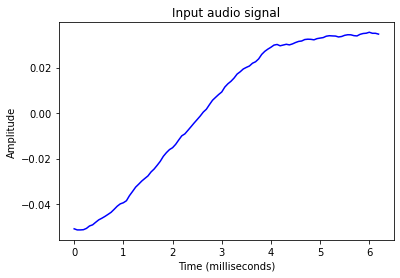

In [7]:
plt.plot(time_axis, audio_signal, color='blue')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Input audio signal')
plt.show()

In [3]:
audio_data = '././vad_data//1034-121119-0051.wav'
x , sr = librosa.load(audio_data, duration=3)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [10]:
1/sr * len(x)

14.98

In [3]:
start = 8.25
end = 8.26
seg_star = int(np.floor(start * sr))
seg_end = int(np.floor(end * sr))
print(seg_star, seg_end)

NameError: name 'sr' is not defined

In [6]:
ipd.Audio(audio_data)

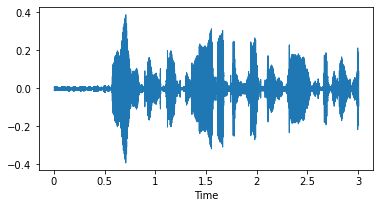

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(6, 3))
librosa.display.waveshow(x, sr=sr)

In [4]:
audio_data = './vad_data/1034-121119-0051.wav'
x , sr = librosa.load(audio_data)
start = 10
end = 11
seg_star = int(np.floor(start * sr))
seg_end = int(np.floor(end * sr))
ipd.Audio(data=x[seg_star:seg_end], rate=sr)

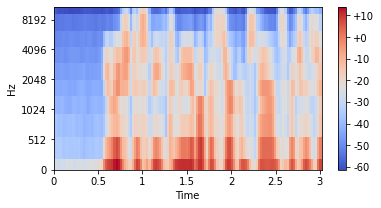

In [9]:
# y, sr = librosa.load(audio_data, mono=True, duration=5, sr=16000)
mel_spectrogram = librosa.feature.melspectrogram(x, sr=sr, n_fft=2048, hop_length=512, n_mels=10)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
plt.figure(figsize=(6, 3))
librosa.display.specshow(log_mel_spectrogram, 
                         x_axis="time",
                         y_axis="mel", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

In [20]:
mfcc = librosa.feature.mfcc(x[seg_star:seg_end], sr, n_mfcc=13, n_fft=512 ,hop_length=128)
librosa.feature.delta(mfcc)

array([[ 0.8746908 ,  0.8746908 ,  0.8746908 , ..., -8.016322  ,
        -8.016322  , -8.016322  ],
       [-0.41103044, -0.41103044, -0.41103044, ..., -1.3777509 ,
        -1.3777509 , -1.3777509 ],
       [-3.3807411 , -3.3807411 , -3.3807411 , ...,  4.0468273 ,
         4.0468273 ,  4.0468273 ],
       ...,
       [-0.2699696 , -0.2699696 , -0.2699696 , ...,  0.7222117 ,
         0.7222117 ,  0.7222117 ],
       [-0.4693213 , -0.4693213 , -0.4693213 , ...,  2.9502723 ,
         2.9502723 ,  2.9502723 ],
       [ 0.96404135,  0.96404135,  0.96404135, ...,  0.85506886,
         0.85506886,  0.85506886]], dtype=float32)

,duration
count,32560.000000
mean,0.292381
std,0.175828
min,0.010000
25%,0.150000
50%,0.250000
75%,0.400000
max,1.360000


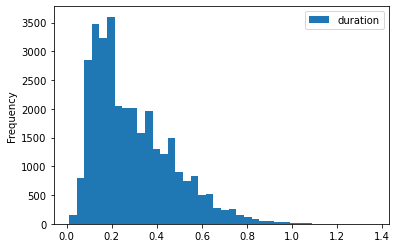

In [14]:
import  pandas as pd
df = pd.read_csv('output.csv')
a = pd.DataFrame(df, columns=['duration'])
ax = a.plot.hist(bins=40)
a.describe()

In [6]:
def extract_features(signal, sr=16000, n_mfcc=5, size=512, step=16, n_mels=40):
    mfcc = librosa.feature.mfcc(signal, sr=sr, n_mfcc=n_mfcc, n_fft=size, hop_length=step)
    mfcc_delta = librosa.feature.delta(mfcc)
    mfcc_delta_2 = librosa.feature.delta(mfcc, order=2)

    mel_spectogram = librosa.feature.melspectrogram(signal, sr=sr, n_mels=n_mels, n_fft=size, hop_length=step)
    rmse = librosa.feature.rms(S=mel_spectogram, frame_length=n_mels * 2 - 1, hop_length=step)

    mfcc, mfcc_delta, mfcc_delta_2, rmse = np.asarray(mfcc), np.asarray(mfcc_delta), np.asarray(mfcc_delta_2), np.asarray(rmse)
    # print(mfcc.shape, mfcc_delta.shape, mfcc_delta_2.shape, rmse.shape)
    features = np.concatenate((mfcc, mfcc_delta, mfcc_delta_2, rmse), axis=0)
    return features.transpose()

nbseg = (seg_end - seg_star)//1024
print(nbseg)
data = []
start = seg_star
for seg in range(nbseg):
    data.append(extract_features(x[start:start+1024]))
    start += 1024

21


In [7]:
import tensorflow as tf
model = tf.keras.models.load_model('models/tuan.h5')

Metal device set to: Apple M1


2022-02-03 23:38:17.387158: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-03 23:38:17.387650: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
import numpy as np
data = np.asarray(data)
model.predict(data)

2022-02-03 23:38:20.494799: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-02-03 23:38:20.672471: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [1]:
import numpy as np
import tensorflow as tf
tf.__version__

X = np.arange(1, 101, step=0.1)
y = [x + 10 for x in X]

X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(1,), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mean_absolute_error,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=['mean_absolute_error']
)

model.fit(X, y, epochs=100)

2022-02-03 23:40:01.674829: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-03 23:40:01.675146: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-02-03 23:40:01.768111: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Metal device set to: Apple M1
Epoch 1/100
13/32 [===========>..................] - ETA: 0s - loss: 23.7126 - mean_absolute_error: 23.7126

2022-02-03 23:40:01.934678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 5ms/step - loss: 13.5329 - mean_absolute_error: 13.5329
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 10.4453 - mean_absolute_error: 10.4453
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 10.6105 - mean_absolute_error: 10.6105
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 5.3354 - mean_absolute_error: 5.3354
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 5.2782 - mean_absolute_error: 5.2782
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 4.4309 - mean_absolute_error: 4.4309
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 4.6422 - mean_absolute_error: 4.6422
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 2.1984 - mean_absolute_error: 2.1984
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 5.3761 - mean_absolute_error: 5.3761
Epoch 10/100
32/